

1.   load input to datafarmes
2.   create model
1.   check shapes of inputs
2.   compile model





In [9]:
!ls drive/MyDrive/*.csv


drive/MyDrive/car_data.csv  drive/MyDrive/heart.csv


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
patient_health_data=pd.read_csv('drive/MyDrive/heart.csv')
patient_health_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
missing_count = patient_health_data.isnull().sum()
print(missing_count)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
patient_health_data['RestingBP'] = patient_health_data.groupby('HeartDisease', group_keys=False)['RestingBP'].apply(lambda x: x.replace(0, x.median()))
patient_health_data['Cholesterol'] = patient_health_data.groupby('HeartDisease', group_keys=False)['Cholesterol'].apply(lambda x: x.replace(0, x.median()))
patient_health_data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
X=patient_health_data.drop('HeartDisease',axis=1)
y=patient_health_data['HeartDisease']
type(X)

pandas.core.frame.DataFrame

In [11]:
scaler=MinMaxScaler()
X_num_cols=X.select_dtypes(exclude=['object'])
X[X_num_cols.columns]=scaler.fit_transform(X_num_cols)
X_scaled=pd.get_dummies(X)
X_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.0,0.507042,0.431818,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,0.816327,0.533333,0.208494,1.0,0.570423,0.681818,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,0.591837,0.416667,0.088803,0.0,0.387324,0.431818,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,0.591837,0.416667,0.291506,0.0,0.802817,0.295455,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [13]:
(X_train,X_test,y_train,y_test) = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
type(X_train),len(y_train),len(X_test),len(y_test)

(pandas.core.frame.DataFrame, 734, 184, 184)

In [79]:
'''scaler=MinMaxScaler()
X_num_cols=X_train.select_dtypes(exclude=['object'])
X_train[X_num_cols.columns]=scaler.fit_transform(X_num_cols)
X_train'''

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,0.270833,M,NAP,0.60,0.398010,1.0,Normal,0.943662,N,0.386364,Down
25,0.145833,M,NAP,0.65,0.346600,0.0,Normal,0.830986,N,0.295455,Up
84,0.562500,M,ASY,0.75,0.353234,1.0,Normal,0.457746,Y,0.409091,Flat
10,0.166667,F,NAP,0.65,0.349917,0.0,Normal,0.577465,N,0.295455,Up
344,0.458333,M,ASY,0.60,0.000000,1.0,Normal,0.309859,N,0.295455,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,0.395833,F,ASY,0.60,0.421227,0.0,ST,0.352113,N,0.295455,Up
270,0.333333,M,ASY,0.60,0.373134,0.0,Normal,0.563380,N,0.295455,Up
860,0.645833,M,ASY,0.65,0.419569,0.0,Normal,0.591549,Y,0.454545,Up
435,0.645833,M,ASY,0.76,0.000000,0.0,ST,0.408451,Y,0.295455,Up


In [61]:
#X_train_scaled=pd.get_dummies(X_train)
#X_train_scaled.shape[1]

20

In [15]:
tf.random.set_seed(42)
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model1.add(tf.keras.layers.Dense(100,activation='relu'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model1.compile(loss=tf.keras.losses.BinaryCrossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [100]:
history=model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6260 - loss: 0.6422
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.4802
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8473 - loss: 0.4090
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3445
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.3306
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.3120
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.3337
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8800 - loss: 0.3146
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3438
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8898 - loss: 0.3010
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3185  
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

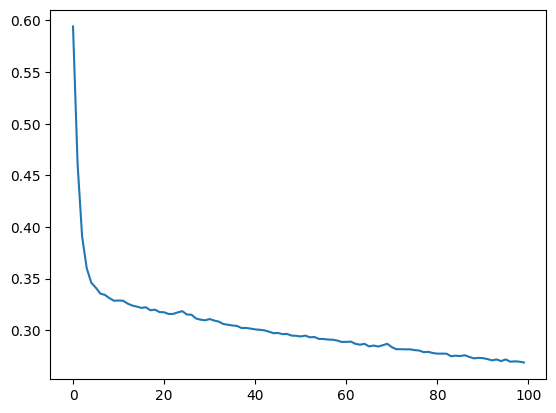

In [101]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
#model1.evaluate(X_train_scaled,y_train)

In [108]:
y_pred=model1.predict(X_test)
model1.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3191 


[0.3262421190738678, 0.875]

In [109]:
confusion_matrix(y_test,y_pred.round())

array([[70,  7],
       [16, 91]])

In [113]:
tf.random.set_seed(42)
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model2.add(tf.keras.layers.Dense(100,activation='relu'))
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch / 20))
model2.compile(loss=tf.keras.losses.BinaryCrossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history2=model2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=lr_scheduler)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2656 - loss: 0.7508 - val_accuracy: 0.3696 - val_loss: 0.7211 - learning_rate: 1.0000e-04
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2864 - loss: 0.7283 - val_accuracy: 0.4674 - val_loss: 0.6971 - learning_rate: 1.1220e-04
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5036 - loss: 0.7000 - val_accuracy: 0.6033 - val_loss: 0.6731 - learning_rate: 1.2589e-04
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6409 - loss: 0.6747 - val_accuracy: 0.7283 - val_loss: 0.6471 - learning_rate: 1.4125e-04
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7450 - loss: 0.6449 - val_accuracy: 0.8043 - val_loss: 0.6205 - learning_rate: 1.5849e-04
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7521 - loss: 0.6156 - val_accuracy: 0.8207 - val_loss: 0.5942 - learning_rate: 1.7783e-04
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7

In [114]:
y_pred2=model1.predict(X_test)
model2.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5710 - loss: 0.6837 


[0.6801300644874573, 0.58152174949646]

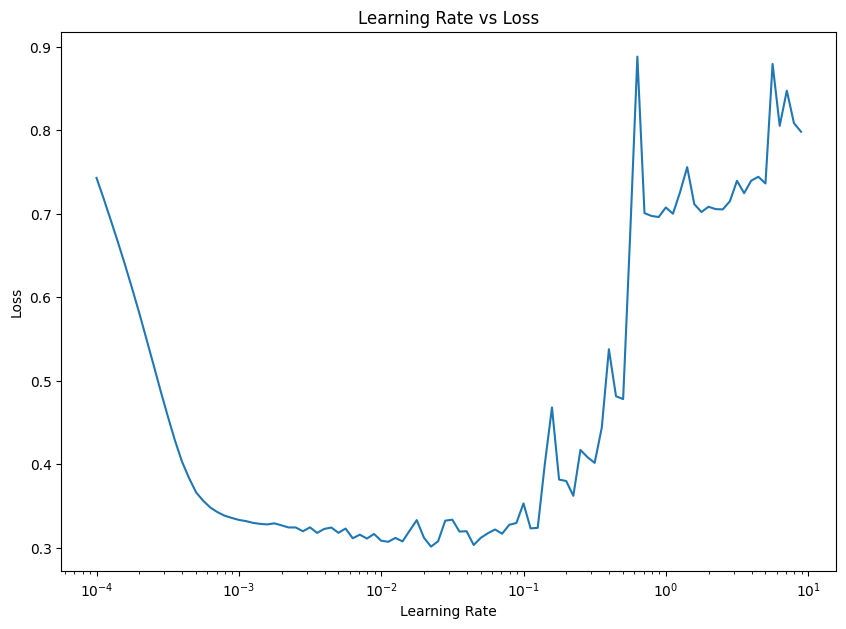

In [115]:
lrs=1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.show()

Text(0.5, 0, 'epochs')

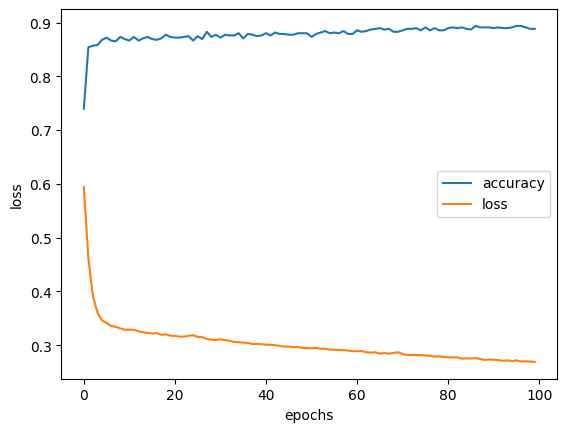

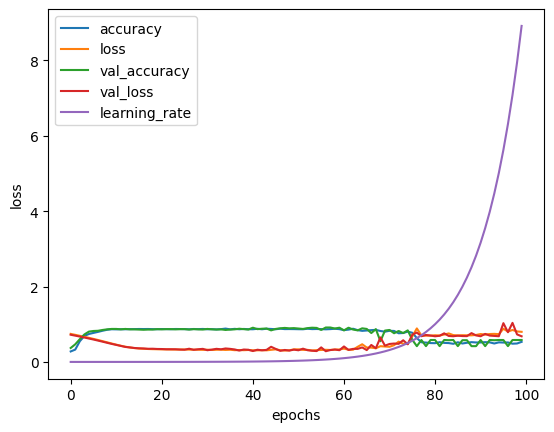

In [116]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [16]:
tf.random.set_seed(42)
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model3.add(tf.keras.layers.Dense(50,activation='relu'))
model3.add(tf.keras.layers.Dense(50,activation='relu'))
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model3.compile(loss=tf.keras.losses.BinaryCrossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history3=model3.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6353 - loss: 0.5975 - val_accuracy: 0.8478 - val_loss: 0.4790
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8574 - loss: 0.4541 - val_accuracy: 0.8478 - val_loss: 0.3915
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3753 - val_accuracy: 0.8207 - val_loss: 0.3716
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.3569 - val_accuracy: 0.8207 - val_loss: 0.3639
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.3514 - val_accuracy: 0.8207 - val_loss: 0.3573
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.3473 - val_accuracy: 0.8261 - val_loss: 0.3529
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8590 - loss: 0.3444 - val_accuracy: 0.8315 - val_loss: 0.3491
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8608 - loss: 0.3416 - val_accuracy: 0.8370 - 

In [17]:
y_pred3=model3.predict(X_test)
model3.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.3265 


[0.32240742444992065, 0.8804348111152649]

Text(0.5, 0, 'epochs')

<Figure size 1000x700 with 0 Axes>

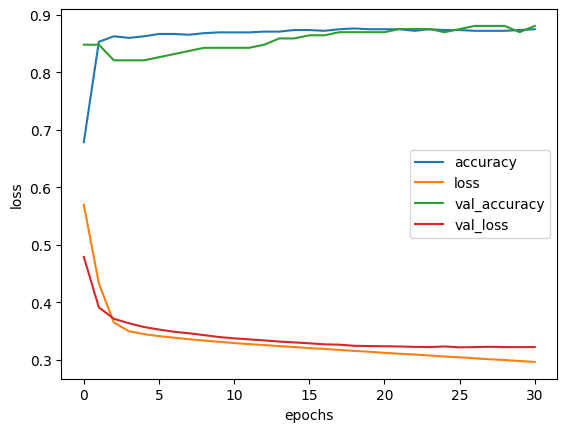

In [18]:
plt.figure(figsize=(10,7))
pd.DataFrame(history3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


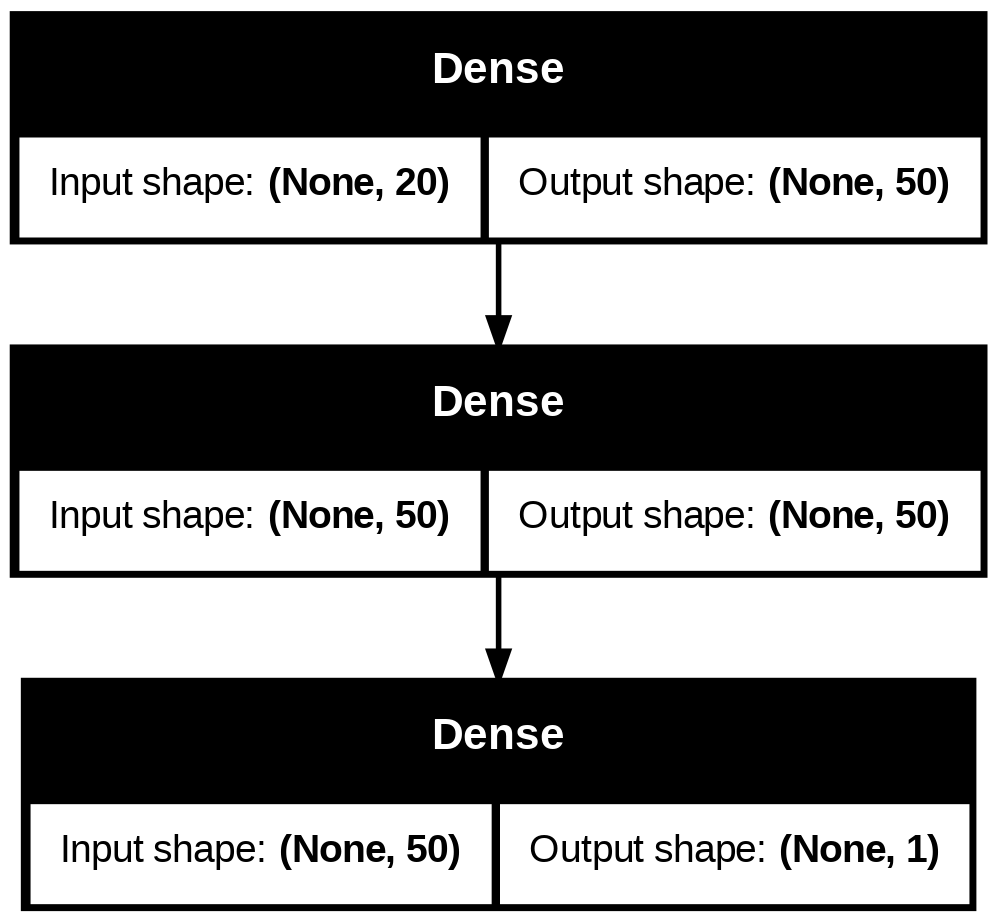

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model3,show_shapes=True)

In [26]:
confusion_matrix(y_test,y_pred3.round())

array([[70,  7],
       [15, 92]])

In [42]:
columns = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
data = [[40,'F','ATA',100,134,0,'Normal',105,'N',0,'Flat'],
        [50,'M','ASY',160,289,0,'Normal',150,'Y',2,'Up']]
test_df = pd.DataFrame(data, columns=columns)
test_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,F,ATA,100,134,0,Normal,105,N,0,Flat
1,50,M,ASY,160,289,0,Normal,150,Y,2,Up


In [46]:
scaler=MinMaxScaler()
test_num_cols=test_df.select_dtypes(exclude=['object'])
test_df[test_num_cols.columns]=scaler.fit_transform(test_num_cols)
test_scaled=pd.get_dummies(test_df)
test_scaled_padded=test_scaled.reindex(columns=X_train.columns,fill_value=0)
test_scaled_padded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,True,0,0,0,True,0,True,False,0,True,False
1,1.0,1.0,1.0,0.0,1.0,1.0,False,True,True,False,0,0,0,True,0,False,True,0,False,True


In [47]:
y_pred4=model3.predict(test_scaled_padded)
y_pred4.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.],
       [1.]], dtype=float32)